In [6]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Гномы уже стимулированы выполнять задания: они любят камни и хотят их добывать как можно больше, как можно меньше при этом работая. В исходной ситуации, единственным их ориентиром служит чувство удовлетворения.

График 1 изображает работу за день в исходных условиях. Линия "satisfaction" - это скачок удовлетворения, получаемый от осознания, что работы было сделано много и день прошел не зря, "expenses" - усталость и траты на оборудование для проведение работ, "profit" - итоговая прибыль, деньги и моральное удовлетворение. 

Чувство удовлетворения - величина эмпирическая и не очень надежная. Что будет, если гномы вдруг перестанут добывать драгоценности, потому что они нашли другой источник удовлетворения? Как покроют издержки их поставщики? Как изменится мир, если спрос на другоценности больше нельзя будет удовлетворить? Даже и думать не хочу.

Таким образом, наша с вами задача - потакать слабостям гномов, принуждая их добывать все больше драгоценностей, идеально - вогнать их в положение, из которого нет выхода, нет никакой возможности отказаться от работы.

Как я уже говорил, гномы и сами бы хотели добывать больше, а работать меньше. Специально для этого мною был разработан проект повышения качества добывающего оборудования.

Итак, введем систему уровней. На каждом следующем уровне гном может иметь более крутое оборудование и более легко добывать драгоцености. Оборудование гном покупает сам за те деньги, которые заработал. Система уровней на примере кирки:
1 уровень - деревянная кирка
2 - каменная
3 - железная
4 - алмазная
и так далее. Вы скажете, что гномы могут и сами себе алмазную кирку сделать, они же алмазы добывают. Но нет, не могут, потому что здесь нужны инженерные решения, которые уже запатентованы. По судам затаскают.

Такое можно придумать для каждого элемента оборудования. В результате количество уровней будет фактически бесконечным, последний уровень - недостижимым.

Суть в том, чтобы подменить систему ценностей - теперь удовлетворение достигается только тогда, когда начинает хватать денег на следующий уровень оборудования. Каждый раз достигнуть нового уровня все сложнее, но и производительность растет, так что в целом скорость достижения нового уровня одна и та же.

Иллюстрация этого метода показана на рисунке 2: в первый день гном работает не покладая рук и достигает 3 уровня (при этом он мотивирован настолько, что добывает тройную норму!). На следующий день, придя с оборудованием третьего уровня, гном достигает четвертого и очень доволен (уровень удовлетворения на данном графике не показан). В то же время, гном добыл в четыре раза больше, чем при прежней схеме. 

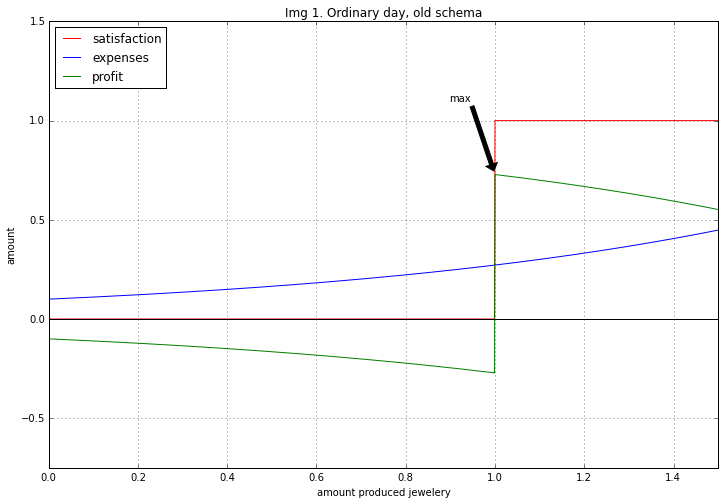

In [190]:
def income(t):
    return [int (i) for i in t]

def expenses(t):
    return 0.1*exp(t)

def profit(t):
    return income(t) - expenses(t)

t = np.arange(0., 5., 0.001)
plt.figure(figsize=(12, 8))
plt.plot(t, income(t), 'r-', label = 'satisfaction')
plt.plot(t, expenses(t), 'b-', label = 'expenses')
plt.plot(t, profit(t), 'g-', label = 'profit')
plt.xlim([0, 1.5])
plt.ylim([-0.75, 1.5])
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel("amount produced jewelery")
plt.ylabel("amount")
plt.legend(loc=2)

plt.annotate('max', xy=(1, profit([1])), xytext=(0.9, 1.1), arrowprops=dict(facecolor='black', shrink=0.05))

plt.title("Img 1. Ordinary day, old schema")

plt.show()

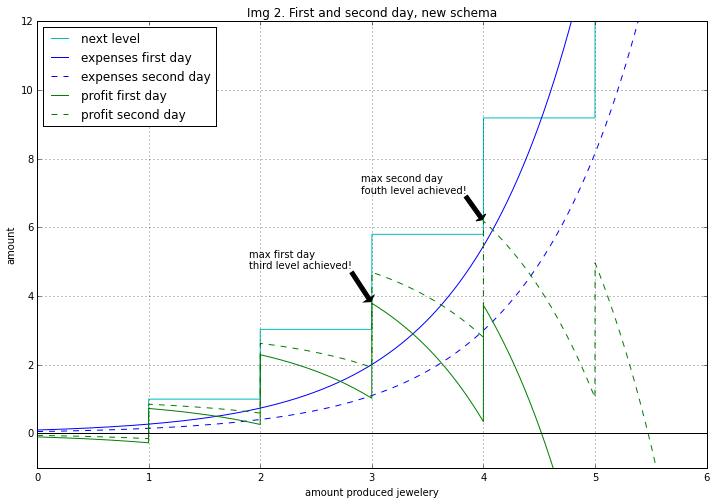

In [191]:
def income(t):
    return [pow(int(i), 1.6) for i in t]

def expenses(t, const):
    return const*exp(t)

def profit(t, const):
    return income(t) - expenses(t, const)

t = np.arange(0., 7., 0.001)
plt.figure(figsize=(12, 8))
plt.plot(t, income(t), 'c-', label = 'next level')
plt.plot(t, expenses(t, 0.1), 'b-', label = 'expenses first day')
plt.plot(t, expenses(t, 0.055), 'b--', label = 'expenses second day')
plt.plot(t, profit(t, 0.1), 'g-', label = 'profit first day')
plt.plot(t, profit(t, 0.055), 'g--', label = 'profit second day')
plt.xlim([0, 6])
plt.ylim([-1, 12])
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel("amount produced jewelery")
plt.ylabel("amount")
plt.legend(loc=2)

plt.annotate('max first day\nthird level achieved!', xy=(3, profit([3], 0.1)), xytext=(1.9, 4.8), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('max second day\nfouth level achieved!', xy=(4, profit([4], 0.055)), xytext=(2.9, 7), arrowprops=dict(facecolor='black', shrink=0.05))

plt.title("Img 2. First and second day, new schema")

plt.show()

Все знают, что незаменимых гномов не бывает. Ясно, что если при найме новых сотрудников выбирать агентов с наилучшей функцией полезности, то это будет полезно для компании - продуктивность работников в целом будет возрастать. За функцию полезности в данном случае стоит считать "количество драгоценностей, которые работник может собрать до достижения чувства полного изнеможения"

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app


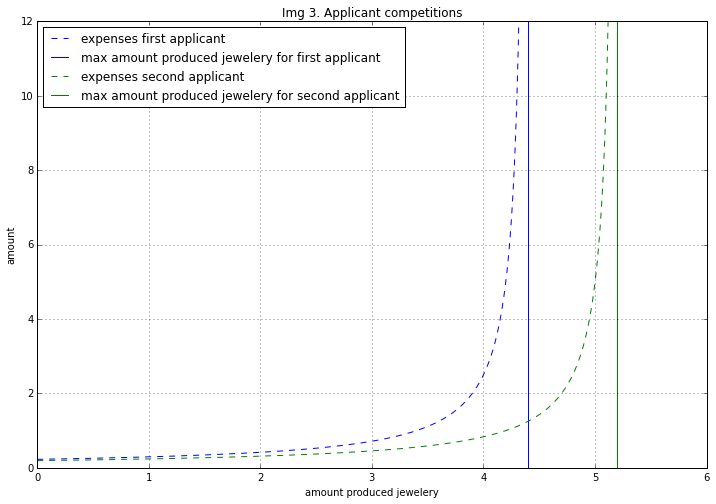

In [193]:
def expenses(t, const):
    return 1/(const - t)

t = np.arange(0.001, 7., 0.001)
plt.figure(figsize=(12, 8))
plt.plot(t, expenses(t, 4.4), 'b--', label = 'expenses first applicant')
plt.plot([4.4 for i in range(2)], [-100, 100], 'b-', label = 'max amount produced jewelery for first applicant')
plt.plot(t, expenses(t, 5.2), 'g--', label = 'expenses second applicant')
plt.plot([5.2 for i in range(2)], [-100, 100], 'g-', label = 'max amount produced jewelery for second applicant')
plt.xlim([0, 6])
plt.ylim([0, 12])
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel("amount produced jewelery")
plt.ylabel("amount")
plt.legend(loc=2)

plt.title("Img 3. Applicant competitions")

plt.show()

В жилах гномов течет горячая кровь, из зависти гномы готовы красть и даже убивать. Не стоит даже проводить какие-то отдельные соревнования - менее успешный гном всегда тянется за более успешным, стремясь добиться такого же, в данном случае, уровня оборудования. 

Здесь, наверное, нужно сказать, что нужно больше поощрять сотрудников, которые приносят больше дохода компании. Введенная нами в самом начале система уровней дает мотивацию двигаться ко все более невероятным успехам для всех работников.

